<a href="https://colab.research.google.com/github/Ayat166/Perceptron-Adaline/blob/main/Perceptron%26Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data = pd.read_csv("/content/data_banknote_authentication.csv")
data = shuffle(data, random_state=42) # shuffle the data

In [ ]:
data.columns =['feature1', 'feature2', 'feature3', 'feature4', 'Class']
data
X = data[['feature1', 'feature2', 'feature3', 'feature4']].values
y = data['Class'].values
# Standardize features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

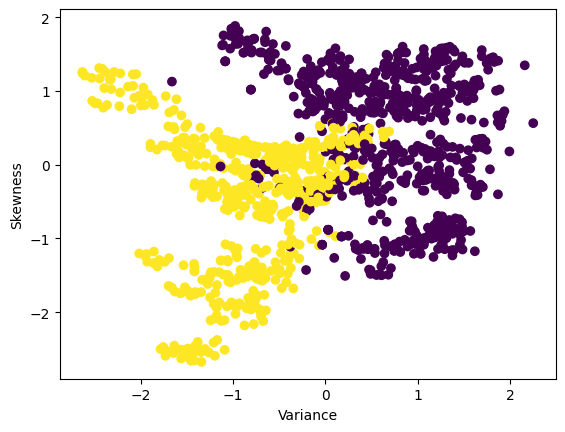

In [ ]:
# Scatter plot
plt.scatter(X_std[:, 0], X_std[:, 1], c=y)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()


In [ ]:
# Perceptron algorithm
def Perceptron(X, Y):
    learningRate = 0.001
    iteration = 10000
    n_samples, n_features = X.shape
    w = np.ones(n_features)
    b = 0
    errors = []
    for i in range(iteration):
        error = 0
        for x, y in zip(X, Y):
            z = np.dot(x, w) + b
            if z > 0:
                z = 1
            else:
                z = 0
            w = w - learningRate * (z - y) * x
            b = b - learningRate * (z - y)
            error += abs(learningRate * (y - z))
        errors.append(error / n_samples)
    return w,b, errors

In [ ]:
# Adaline algorithm
def Adaline(X, Y):
    learningRate = 0.0001
    iteration = 1000000
    n_samples, n_features = X.shape
    w = np.random.rand(n_features)
    b = np.random.rand()
    cost = []
    for _ in range(iteration):
        z = np.dot(X, w) + b
        error = Y - z
        cost.append(0.5 * np.sum(error ** 2))
        w += learningRate * np.dot(X.T, error)
        b += learningRate * np.sum(error)
    return w, b, cost

In [ ]:
# Compute weights and biases for Perceptron
w_perceptron, b_perceptron, errors_perceptron = Perceptron(X_std, y)
print('Mean error of Perceptron:',  np.mean(errors_perceptron))

Mean error of Perceptron: 1.1643544857768056e-05


In [ ]:
# Compute weights and biases for Adaline
w_adaline, b_adaline, cost_adaline = Adaline(X_std, y)
print('Mean cost of Adaline:', np.mean(cost_adaline))


Mean cost of Adaline: 22.895514395795082


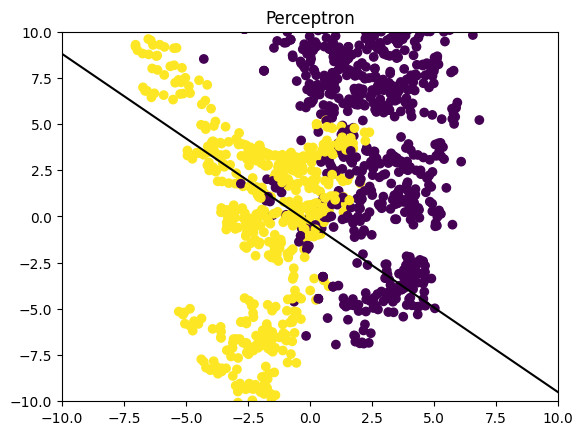

In [ ]:
x_plot = np.linspace(-10, 10, 100)
y_plot = (-w_perceptron[0] / w_perceptron[1]) * x_plot - (b_perceptron / w_perceptron[1])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Perceptron')
plt.show()



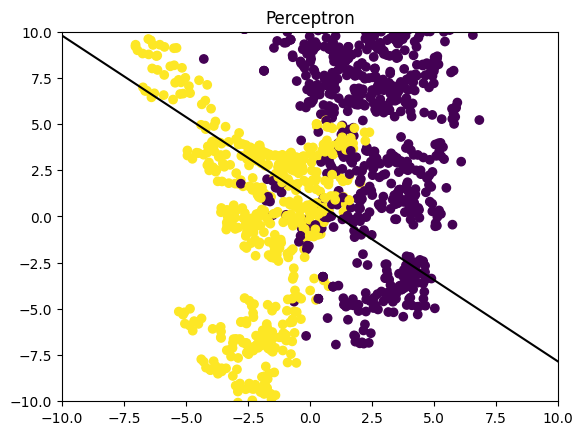

In [ ]:
x_plot = np.linspace(-10, 10, 100)
y_plot = (-w_adaline[0] / w_adaline[1]) * x_plot - (b_adaline / w_adaline[1])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Perceptron')
plt.show()
